In [1]:
!conda env list

# conda environments:
#
                         C:\Program Files\Orange
base                     C:\ProgramData\Anaconda3
car_speed_env            C:\ProgramData\Anaconda3\envs\car_speed_env
cuda_tut_env          *  C:\ProgramData\Anaconda3\envs\cuda_tut_env
untitled                 C:\ProgramData\Anaconda3\envs\untitled
finance_dashboard        C:\Users\Reza\.conda\envs\finance_dashboard
sherlock                 C:\Users\Reza\.conda\envs\sherlock
vocal                    C:\Users\Reza\.conda\envs\vocal



In [1]:
from numba import cuda
import numpy as np

In [2]:
#Check for GPU devices

print(cuda.gpus)

<Managed Device 0>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
size = 400
iterations = 100

In [4]:
def mandelbrot_python(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
                 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m
%timeit mandelbrot_python(size, iterations)

4.44 s ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


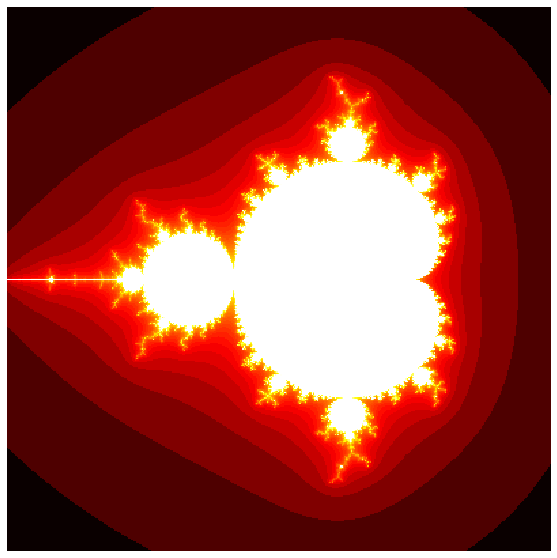

In [12]:
m = mandelbrot_python(size, iterations)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(m), cmap=plt.cm.hot)
ax.set_axis_off()

In [9]:
# Using jit

In [5]:
from numba import jit

@jit
def mandelbrot_numba(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
                 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

# mandelbrot_numba(size, iterations)
%timeit mandelbrot_numba(size, iterations)

21.1 ms ± 277 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
from numba import jit

mandelbrot_numba1 = jit(mandelbrot_python)
%timeit mandelbrot_numba1(size, iterations)

21.7 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


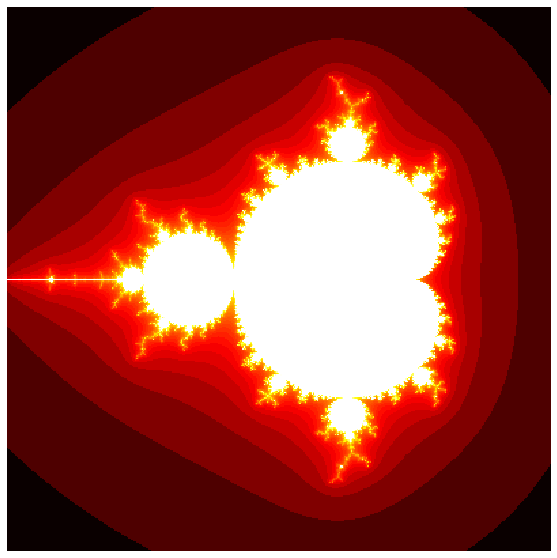

In [13]:
m = mandelbrot_numba(size, iterations)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(m), cmap=plt.cm.hot)
ax.set_axis_off()